<a href="https://colab.research.google.com/github/yosshi18/hoy12/blob/main/ejercicioredes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


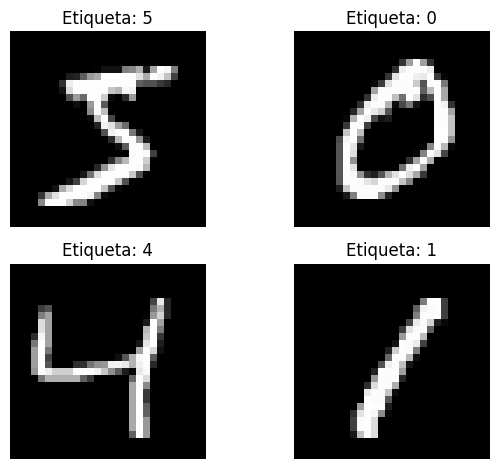

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure()
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [7]:
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [8]:
cnn_model.fit(X_train, y_train,
              epochs=5, batch_size=32,
              validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.8998 - loss: 0.3191 - val_accuracy: 0.9768 - val_loss: 0.0662
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9859 - loss: 0.0450 - val_accuracy: 0.9857 - val_loss: 0.0392
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9909 - loss: 0.0289 - val_accuracy: 0.9867 - val_loss: 0.0427
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9939 - loss: 0.0202 - val_accuracy: 0.9909 - val_loss: 0.0291
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9949 - loss: 0.0155 - val_accuracy: 0.9910 - val_loss: 0.0326


In [12]:
predicciones = cnn_model.predict(X_test[0:2])
esperado = y_test[0:2]
for p, e in zip(predicciones, esperado):
    prediccion = np.argmax(p)
    print(f"Esperado: {e}. Predicción: {prediccion}")

# Esperado: 7. Predicción: 7
# Esperado: 2. Predicción: 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Esperado: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]. Predicción: 7
Esperado: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]. Predicción: 2
